# Visualisation graphique : histogrammes et boîtes à moustaches

In [1]:
import pandas as pd

data = pd.read_csv('Data/fandango-scores.csv')
cols = ['FILM', 'RT_user_norm', 'Metacritic_user_nom', 'IMDB_norm', 'Fandango_Ratingvalue']

data_norm = data[cols]

data_norm.head(10)

,FILM,RT_user_norm,Metacritic_user_nom,IMDB_norm,Fandango_Ratingvalue
0,Avengers: Age of Ultron (2015),4.30,3.55,3.90,4.5
1,Cinderella (2015),4.00,3.75,3.55,4.5
2,Ant-Man (2015),4.50,4.05,3.90,4.5
3,Do You Believe? (2015),4.20,2.35,2.70,4.5
4,Hot Tub Time Machine 2 (2015),1.40,1.70,2.55,3.0
5,The Water Diviner (2015),3.10,3.40,3.60,4.0
6,Irrational Man (2015),2.65,3.80,3.45,3.5
7,Top Five (2014),3.20,3.40,3.25,3.5
8,Shaun the Sheep Movie (2015),4.10,4.40,3.70,4.0
9,Love & Mercy (2015),4.35,4.25,3.90,4.0


## Distribution de fréquences

In [4]:
# Series.values_counts() pour calculer la fréquence de chaque valeurs d'une Series
data_norm["Fandango_Ratingvalue"].value_counts()

4.1    16
3.9    12
4.2    12
4.3    11
3.4     9
3.5     9
4.5     9
3.7     9
3.6     8
4.4     7
4.0     7
3.2     5
3.8     5
2.9     5
3.0     4
3.3     4
4.6     4
4.8     3
3.1     3
2.8     2
2.7     2
Name: Fandango_Ratingvalue, dtype: int64

In [6]:
# Series.sort_index()
freq = data_norm["Fandango_Ratingvalue"].value_counts()
freq.sort_index()

2.7     2
2.8     2
2.9     5
3.0     4
3.1     3
3.2     5
3.3     4
3.4     9
3.5     9
3.6     8
3.7     9
3.8     5
3.9    12
4.0     7
4.1    16
4.2    12
4.3    11
4.4     7
4.5     9
4.6     4
4.8     3
Name: Fandango_Ratingvalue, dtype: int64

__À vous !__
>- Utiliser la méthode value_counts() pour retourner le décompte des fréquences de la colonne 'IMDB_norm'. Trier l'objet Series résultant par son index et assigner le résultat à la variable imdb_distribution.
>- Afficher le résultat.

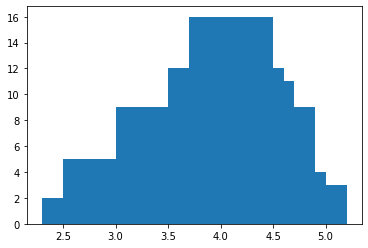

In [7]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.bar(freq.index, freq.values)
plt.show()

In [ ]:
### WARNING: un problème est qu'il y a beaucoup de valeurs uniques (21 pour pour fandango, 41 pour imdb)
# un second problème est qu'il y a une grande différence entre fandango et imdb 
# => une solution est donc de créer une échelle commune pour comparer :
# on va faire des classes (par exemple les notes entre 1 et 2, entre 2 et 3, entre 3 et 4 etc)
# on pourra compter le nombre d'éléments dans chaque classe et les comparer
# c'est le principe d'un histogramme

## Les histogrammes avec Matplotlib

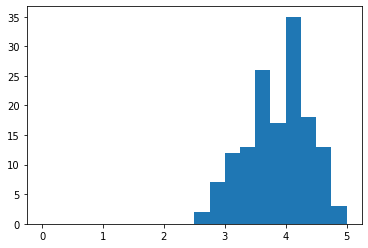

In [28]:
fig, ax = plt.subplots()
ax.hist(data_norm["Fandango_Ratingvalue"], range=(0,5), bins=20)
plt.show()

In [ ]:
#Axes.hist(values,range=(a,b), bins) 
### Regarder l'aide pour voir le fonctionnement par défaut !

- Créer un sous-graphique et assigner les objets Figure à la variable fig et Axes à la variable ax.
- Générer un histogramme des valeurs de la colonne 'Fandango_Ratingvalue' en utilisant un range de 0 à 5.  
- Changez le paramètre `bins`. A quoi sert-il?
- Utiliser plt.show() pour afficher le graphique.

## Comparaison d'histogrammes

__À vous !__
>Tracer un graphique avec 4 sous-graphiques:
>- Pour le sous-graphique associé à la variable ax1:
>>- Générer un histogramme des valeurs de la colonne 'Fandango_Ratingvalue' en utilisant 20 classes (bins) et un intervalle de 0 à 5
>- Pour le sous-graphique associé à la variable ax2:
>>- Générer un histogramme des valeurs de la colonne 'RT_user_norm' en utilisant 20 classes (bins) et un intervalle de 0 à 5
>- Pour le sous-graphique associé à la variable ax3:
>>- Générer un histogramme des valeurs de la colonne 'Metacritic_user_nom' en utilisant 20 classes (bins) et un intervalle de 0 à 5
>- Pour le sous-graphique associé à la variable ax4:
>>- Générer un histogramme des valeurs de la colonne 'IMDB_norm' en utilisant 20 classes (bins) et un intervalle de 0 à 5
>- Pour tous les graphiques définir l'intervalle sur l'axe y de 0 à 50 en utilisant Axes.set_ylim() et choisir un titre.
>- Afficher les histogrammes.

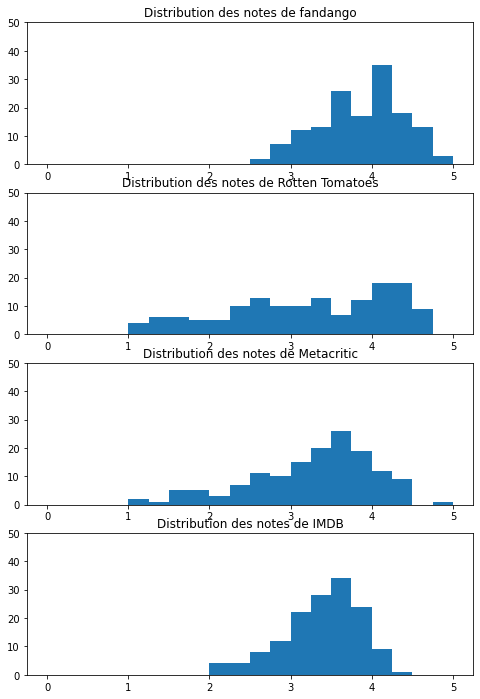

In [37]:
import matplotlib.pyplot as plt

fig, (ax1, ax2, ax3, ax4) = plt.subplots(4,1, figsize=(8,12))


ax1.hist(data_norm['Fandango_Ratingvalue'], bins = 20, range=(0,5))
ax1.set_title('Distribution des notes de fandango')
ax1.set_ylim(0,50)

ax2.hist(data_norm['RT_user_norm'], bins=20, range=(0,5))
ax2.set_title('Distribution des notes de Rotten Tomatoes')
ax2.set_ylim(0,50)

ax3.hist(data_norm['Metacritic_user_nom'], bins=20, range=(0,5))
ax3.set_title('Distribution des notes de Metacritic')
ax3.set_ylim(0,50)

ax4.hist(data_norm['IMDB_norm'], bins=20, range=(0,5))
ax4.set_title('Distribution des notes de IMDB')
ax4.set_ylim(0,50)

plt.show()

## Plusieurs diagrammes à boîtes

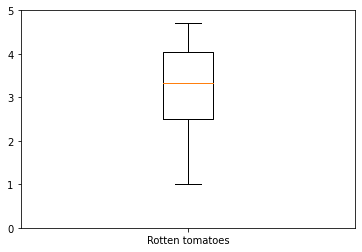

In [40]:
# méthode .boxplot()
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.boxplot(data_norm['RT_user_norm'])
ax.set_xticklabels(['Rotten tomatoes'])
ax.set_ylim(0,5)
plt.show()

__À vous !__
>- Créer un sous-graphique et assigner les objets Figure à la variable fig et Axes à la variable ax.
>- Générer un diagramme à boîtes pour chaque colonne de mes_colonnes = ['RT_user_norm', 'Metacritic_user_nom', 'IMDB_norm', 'Fandango_Ratingvalue']. _Indice : pas besoin de boucles! La méthode boxplot interprète d'elle-même chaque colonne d'un dataframe comme autant de boxplots à créer._
>- Définir pour chaque diagramme un intitulé correspondant au nom de la colonne num_cols et faire une rotation de cet intitulé.
>- Définir l'intervalle de l'axe y de 0 à 5.
>- Afficher le graphique.

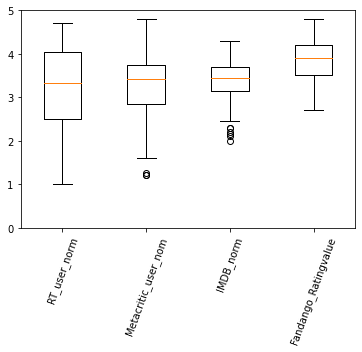

In [44]:
mes_colonnes = ['RT_user_norm', 'Metacritic_user_nom', 'IMDB_norm', 'Fandango_Ratingvalue']

fig, ax = plt.subplots()
ax.boxplot(data_norm[mes_colonnes])
ax.set_xticklabels(mes_colonnes, rotation=70)
ax.set_ylim(0,5)
plt.show()

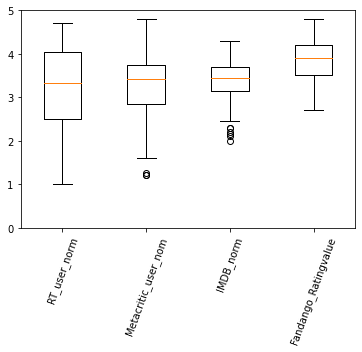

In [42]:
mes_colonnes = ['RT_user_norm', 'Metacritic_user_nom', 'IMDB_norm', 'Fandango_Ratingvalue']
fig, ax = plt.subplots()
ax.boxplot(data_norm[mes_colonnes])
ax.set_xticklabels(mes_colonnes, rotation=70)
ax.set_ylim(0,5)
plt.show()